### Try to predict travel time by ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob

### Preparing


In [2]:
route_path = "data/csv/relationship_routes.csv"
relationship_route = pd.read_csv(route_path)

In [3]:
df_routes_data = pd.read_csv("process-time.csv")
df_routes_data.drop(columns=["Unnamed: 0"], inplace=True)

df_routes_data['ts1'] = pd.to_datetime(df_routes_data["ts1"])

def get_day_of_week(timestamp):
    return timestamp.day_name()
df_routes_data["day_of_week"] = df_routes_data["ts1"].apply(get_day_of_week)

In [4]:
df_routes_data["sid1"] = df_routes_data["sid1"].astype(int)
df_routes_data["sid2"] = df_routes_data["sid2"].astype(int)
df_routes_data

,ts1,lat,lon,speed,direction,sid1,seq,vid,route_id,sid2,ts2,mins,hrs,day_of_week
0,2023-10-03 09:02:52,13.826181,100.503210,1,go,3320,36,16-5128 1,2-23,3321,2023-10-03 09:03:52,1.000000,9,Tuesday
1,2023-10-03 09:35:11,13.873371,100.459790,11,go,2155,6,16-5133 1,2-23,2157,2023-10-03 09:37:12,2.016667,9,Tuesday
2,2023-10-03 06:07:53,13.873243,100.459910,13,go,2155,6,16-5122 1,2-23,2157,2023-10-03 06:09:53,2.000000,6,Tuesday
3,2023-10-03 13:26:56,13.873158,100.460049,9,go,2155,6,16-5122 1,2-23,2157,2023-10-03 13:28:56,2.000000,13,Tuesday
4,2023-10-03 06:37:10,13.803569,100.511984,11,go,2945,62,16-5133 1,2-23,2946,2023-10-03 06:38:10,1.000000,6,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218926,2024-02-05 06:41:36,13.808138,100.649417,0,go,3240,4,11-9290 1,1-38,5325,2024-02-05 06:43:06,1.500000,6,Monday
218927,2024-02-05 06:41:36,13.808138,100.649417,0,go,3240,4,11-9290 1,1-38,5325,2024-02-05 06:43:06,1.500000,6,Monday
218928,2024-02-05 06:41:36,13.808138,100.649417,0,go,3240,4,11-9290 1,1-38,5325,2024-02-05 06:43:06,1.500000,6,Monday
218929,2024-02-05 14:05:08,13.764223,100.538713,2,go,4156,26,16-5775 1,4-62,4157,2024-02-05 14:13:07,7.983333,14,Monday


In [6]:
# df_routes_data.drop(
#     columns=["lat", "lon", "ts2", "vid", "speed"], inplace=True
# )

In [209]:
# test = df_routes_data[
#     (df_routes_data["sid1"] == 4202) & (df_routes_data["sid2"] == 4212)
# ]

# test.sort_values(by=["day_of_week", "hrs"], inplace=True)

# test["mins_LN"] = np.log1p(test["mins"])

# test["mins_DF"] = test["mins"].diff()

# Q3, Q1 = np.percentile(test["mins_DF"], [25, 75])

# IQR = Q3 - Q1
# upper_bound = Q3 + (1.5 * IQR)
# lower_bound = Q1 - (1.5 * IQR)


# test
# lower_bound

,ts1,direction,sid1,seq,route_id,sid2,mins,hrs,day_of_week,time_periods
0,2023-10-09 04:45:02,go,3851,0,2-16,3776,2.250000,4,1,1
1,2023-10-09 04:45:17,go,3851,0,2-16,3776,2.000000,4,1,1
2,2023-10-09 07:07:17,go,3851,0,2-16,3776,2.250000,7,1,1
3,2023-10-09 07:07:32,go,3851,0,2-16,3776,2.000000,7,1,1
4,2023-10-09 04:57:24,go,3851,0,1-15,4893,9.250000,4,1,1
...,...,...,...,...,...,...,...,...,...,...
218926,2023-12-12 13:31:35,go,1060,93,2-23,1061,0.500000,13,2,4
218927,2023-12-12 13:31:35,go,1060,93,2-23,1061,1.633333,13,2,4
218928,2023-12-12 13:31:35,go,1060,93,2-23,1061,5.583333,13,2,4
218929,2023-12-12 13:33:45,go,1060,93,2-23,1061,3.416667,13,2,4


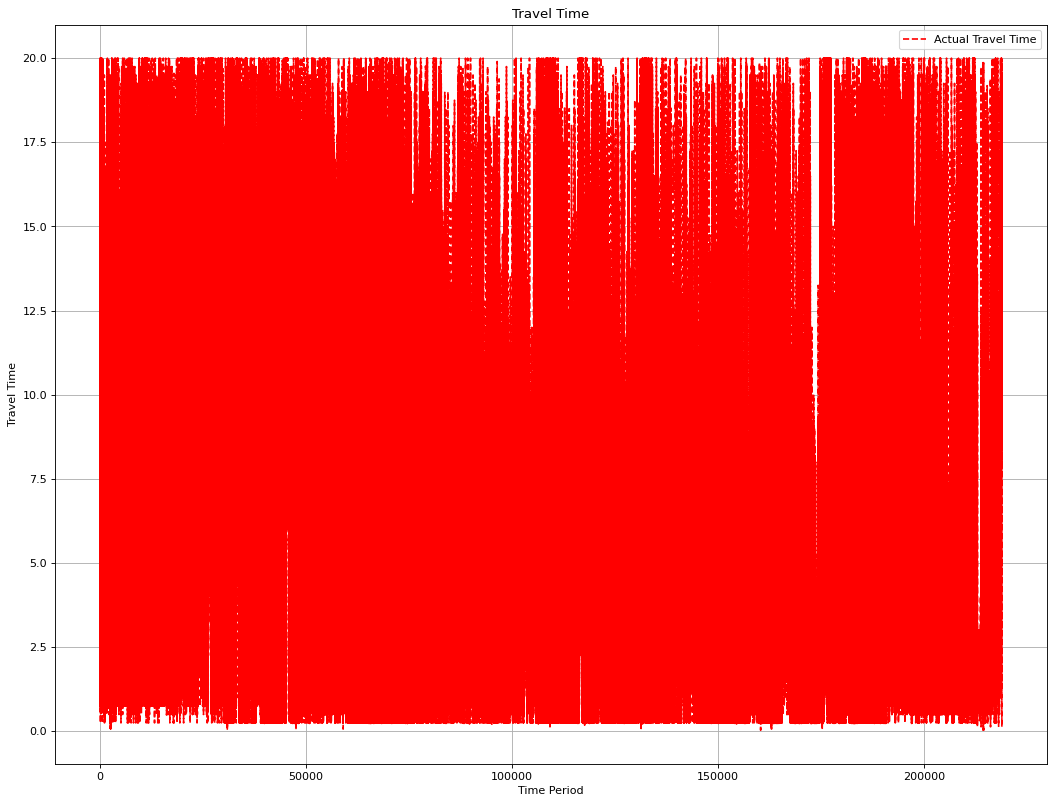

In [253]:
df = df_routes_data
# [  
    # (df_routes_data["sid1"] == 4202) & (df_routes_data["sid2"] == 4212)
    # (df_routes_data["route_id"] == '1-15')
# ]

day_to_num = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7,
}

def map_time_periods(hour):
    if 4 <= hour <= 8:
        return 1
    elif 8 <= hour <= 10:
        return 2
    elif 10 <= hour <= 12:
        return 3
    elif 12 <= hour <= 15:
        return 4
    elif 15 <= hour <= 20:
        return 5
    else:
        return 6

df['time_periods'] = df['hrs'].apply(map_time_periods)

# Use map to convert day names to numbers
df["day_of_week"] = df["day_of_week"].map(day_to_num)

df.sort_values(by=["seq", "day_of_week", "time_periods"], inplace=True)
df = df.reset_index(drop=True)

plt.figure(figsize=(16, 12), dpi=80)
plt.plot(df['mins'], linestyle='--', color='red', label='Actual Travel Time')
# Labeling
plt.title('Travel Time')
plt.xlabel('Time Period')
plt.ylabel('Travel Time')
plt.legend()
plt.grid(True)

df

In [219]:
df.drop(columns=["direction", "sid1", "seq", "route_id", "sid2"], inplace=True)

In [220]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

Log transition


In [221]:
# df["mins"] = np.log1p(df["mins"])

## ARIMA


### Ex1 .Predict()


Find D


p-Values:0.0


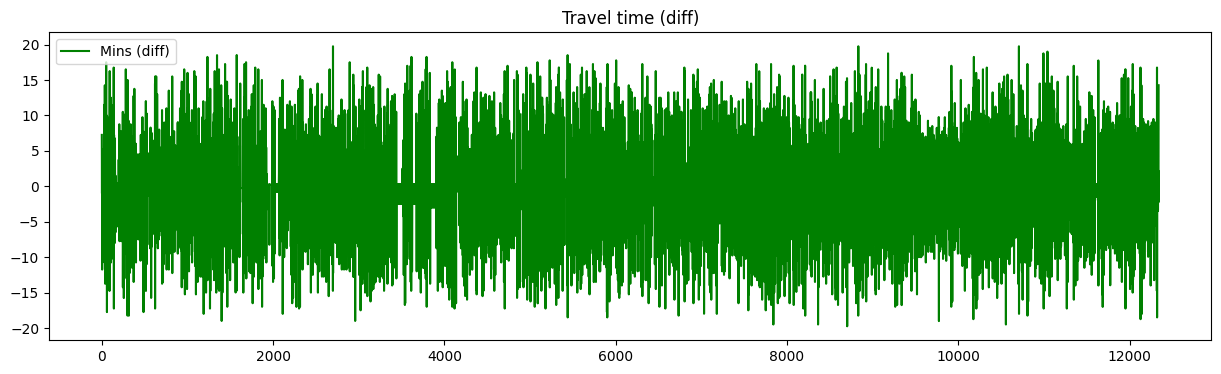

In [222]:
# First difference
df["mins_diff"] = df["mins"].diff(1)
df["mins_diff"].plot(color="green", figsize=(15, 4))
plt.legend(["Mins (diff)"])
plt.title("Travel time (diff)")

adf_res = adfuller(df["mins_diff"].dropna(), autolag="AIC")
print("p-Values:" + str(adf_res[1]))
# 'D = 1'

Find P


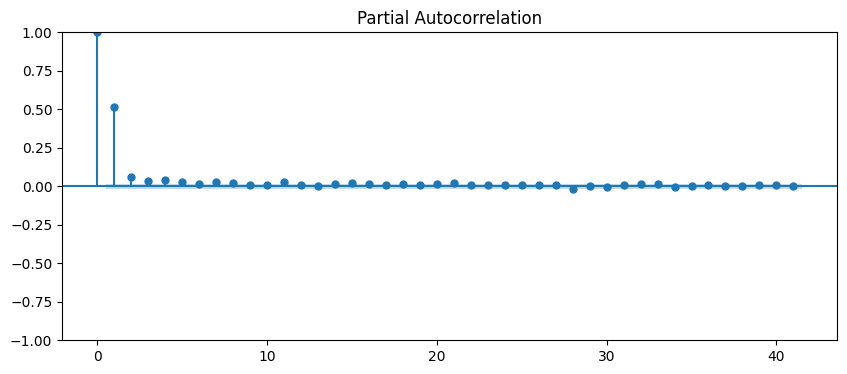

In [223]:
"Components ใน Order(p,d,q) ต่อไปที่เราต้องทำการหาก็คือ “p” หรือมาจากตัว Auto Regressive (AR) นั่นเอง ซึ่งเจ้า AR คือ “lag time” ของตัวมันเอง ดังนั้นแปลความหมายอย่างง่ายก็คือ ค่า ณ วันนี้มีความสัมพันธ์กับค่าที่เกิดขึ้นมาแล้วจากอดีต ณ ช่วงเวลาใดเวลาหนึ่ง"
plt.rcParams.update({"figure.figsize": (10, 4)})
plot_pacf(df["mins"].dropna(), method="ols")
df_pacf = pacf(df["mins"].dropna(), method="ols")

In [224]:
"การคำนวณหาค่า p สามารถหาได้จากจุดตัวของกราฟ ซึ่งเราต้องหาจุดตัดหรือ Cut-off ตาม Confidence interval ที่ 95% ค่า z จะอยู่ที่ 1.96"
for i in range(0, len(df_pacf)):
    if df_pacf[i] < 1.96 / np.sqrt(len(df["mins"])):
        print("p= ", i - 1)
        break

p=  5


Find q


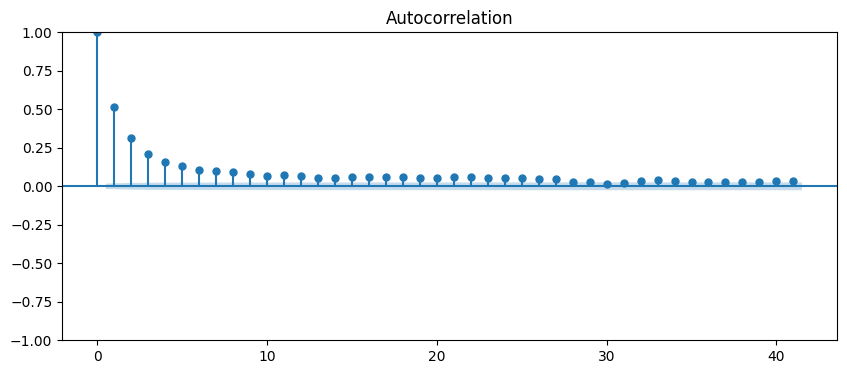

In [227]:
"q คือ lag time ของ Error แทนเท่านั้นเอง"
plt.rcParams.update({"figure.figsize": (10, 4)})
plot_acf(df["mins"], fft=False)
df_acf = acf(df["mins"], fft=False)

In [228]:
# # #Test order
# # AIC ซึ่งค่าจาก Order ที่มีค่า AIC น้อยที่สุดจะสามารถอธิบาย ARIMR Model ของเราได้ดีที่สุด
# import itertools
from statsmodels.tsa.arima_model import ARIMA

# p = d = q = range(0, 3)
# pdq = list(itertools.product(p, d, q))

# aic = []

# for param in pdq:
#     try:
#         model = ARIMA(df['mins'], order=param)
#         results = model.fit()
#         a = 'Order: '+str(param) + ' AIC: ' + str(results.aic)
#         aic.append(a)
#     except:
#         continue

c:\Users\66898\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\66898\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


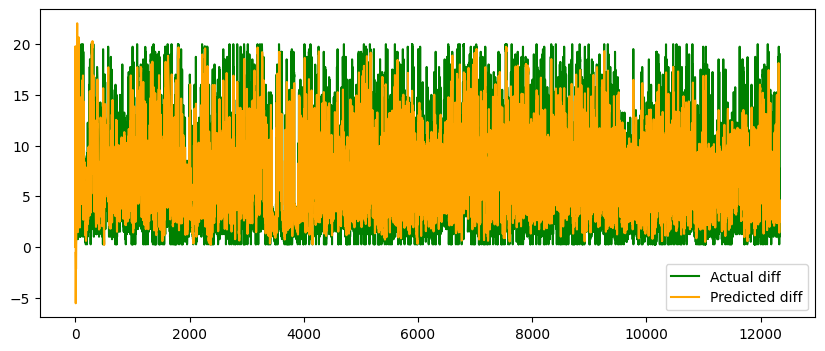

In [232]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["mins"], order=(2, 3, 5))
results = model.fit()
results.summary()

# Prediction
plt.figsize = (15, 4)
plt.plot(df["mins"], color="green", label="Actual diff")
plt.plot(results.predict(), color="orange", label="Predicted diff")
plt.legend()

111.5035874466676

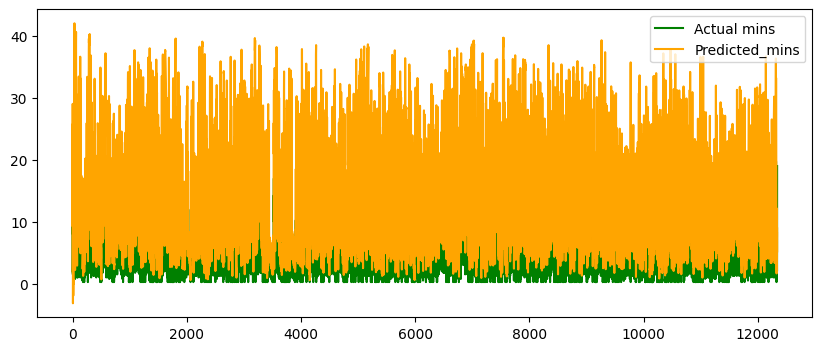

In [233]:
from sklearn.metrics import mean_squared_error
prediction = pd.DataFrame(results.predict())

df_pred = pd.merge(df, prediction, how='left',
                   left_index=True, right_index=True)
df_pred['Predicted_mins'] = df_pred['mins'] + \
    df_pred['predicted_mean'].shift(-1)
df_pred['Predicted_mins'] = df_pred['Predicted_mins'].shift(
    1).fillna(df['mins'])

plt.plot(df_pred['mins'], color='green', label='Actual mins')
plt.plot(df_pred['Predicted_mins'], color='orange', label='Predicted_mins')

plt.legend()

# Performance
mean_squared_error(df_pred['mins'], df_pred['Predicted_mins'])

### EX_2 Trian Test Spilt .forcast()


In [234]:
msk = df.index < len(df) - 200
df_train = df[msk].copy()
df_test = df[~msk].copy()

df_train

,ts1,mins,hrs,day_of_week,time_periods,mins_diff
0,2023-10-09 04:56:24,2.00,4,1,1,NaN
1,2023-10-09 04:57:24,9.25,4,1,1,7.25
2,2023-10-09 04:57:39,9.00,4,1,1,-0.25
3,2023-10-09 06:44:54,8.00,6,1,1,-1.00
4,2023-10-09 06:35:38,13.25,6,1,1,5.25
...,...,...,...,...,...,...
12135,2023-11-26 16:09:13,12.50,16,7,5,5.00
12136,2023-11-26 17:48:28,5.00,17,7,5,-7.50
12137,2023-12-03 16:33:55,2.50,16,7,5,-2.50
12138,2023-12-03 16:33:55,16.75,16,7,5,14.25


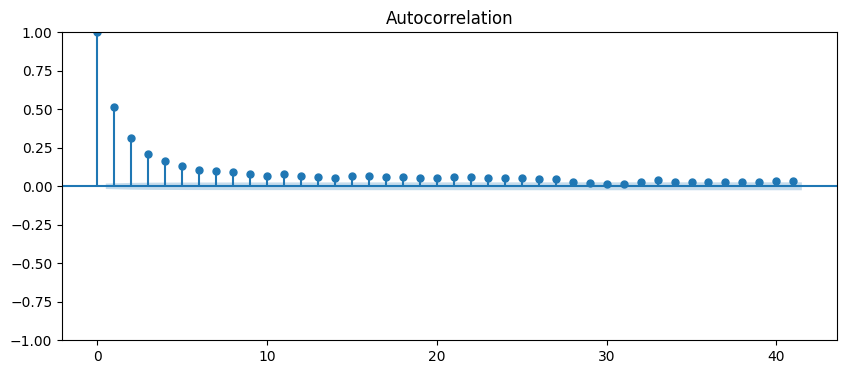

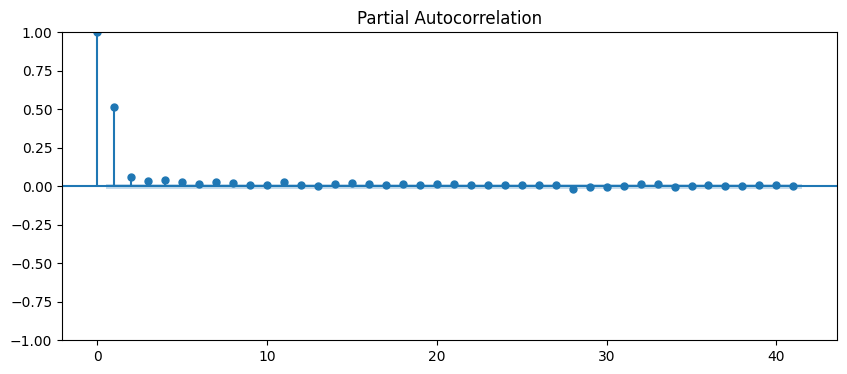

In [235]:
acf_original = plot_acf(df_train["mins"])

pacf_original = plot_pacf(df_train["mins"])

In [236]:
adf_test = adfuller(df_train["mins"])
print(f"p-value: {adf_test[1]}")

p-value: 0.0


Tranforming


<Axes: >

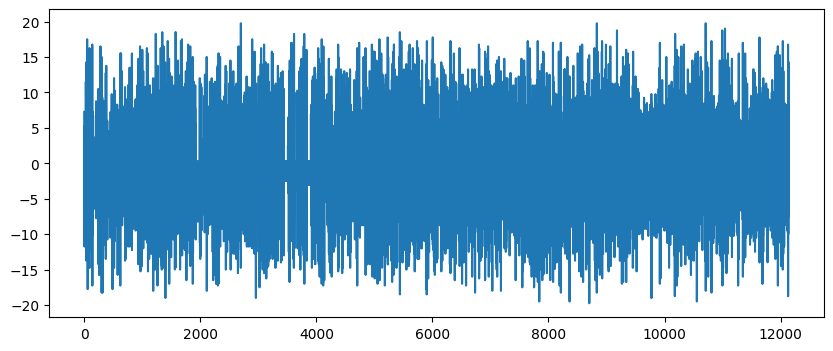

In [237]:
df_train_diff = df_train["mins"].diff().dropna()
df_train_diff.plot()

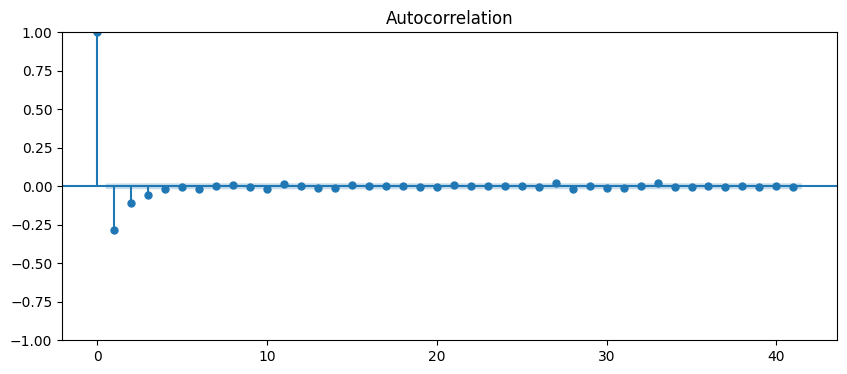

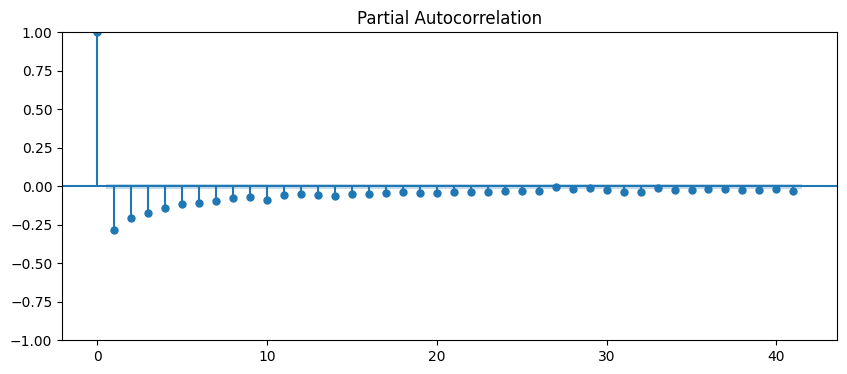

In [238]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [239]:
adf_test = adfuller(df_train_diff)
print(f"p-value: {adf_test[1]}")

p-value: 0.0


In [240]:
model = ARIMA(df_train["mins"], order=(1, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   mins   No. Observations:                12140
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -35688.429
Date:                Sat, 24 Feb 2024   AIC                          71386.858
Time:                        20:17:45   BIC                          71423.879
Sample:                             0   HQIC                         71399.269
                              - 12140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1392      0.117     61.170      0.000       6.910       7.368
ar.L1          0.7253      0.018     39.395      0.000       0.689       0.761
ma.L1         -0.2460      0.020    -12.220      0.0

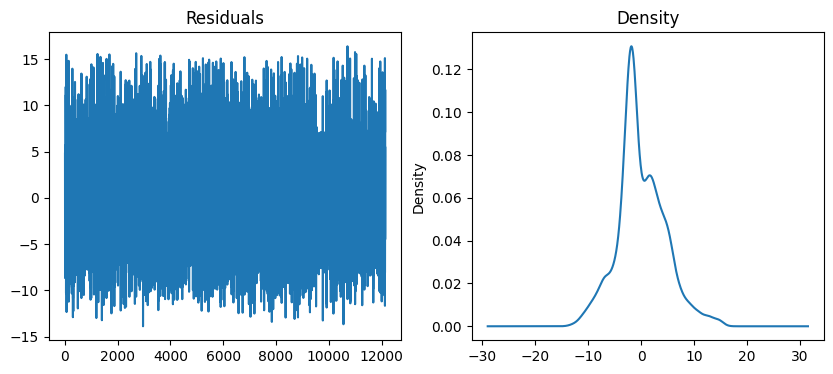

In [241]:
import matplotlib.pyplot as plt


residuals = model_fit.resid[1:]

fig, ax = plt.subplots(1, 2)

residuals.plot(title="Residuals", ax=ax[0])

residuals.plot(title="Density", kind="kde", ax=ax[1])

plt.show()

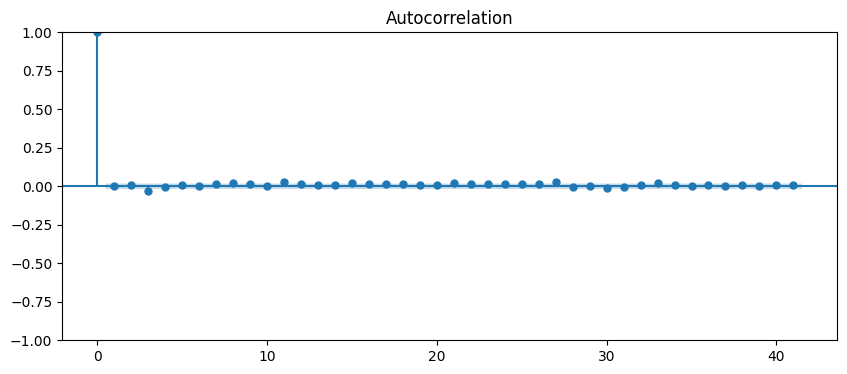

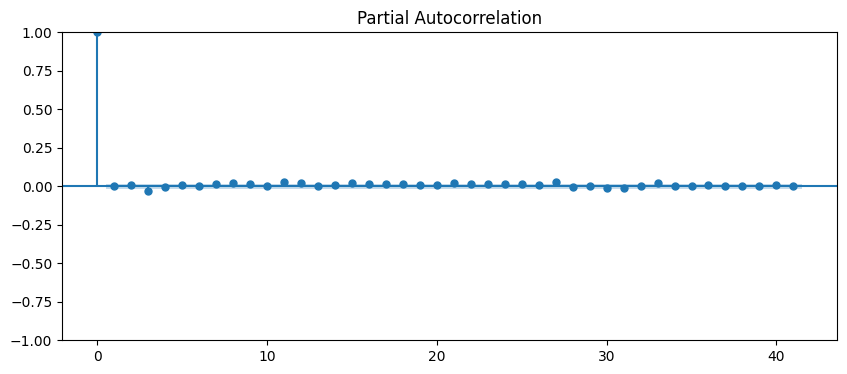

In [242]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

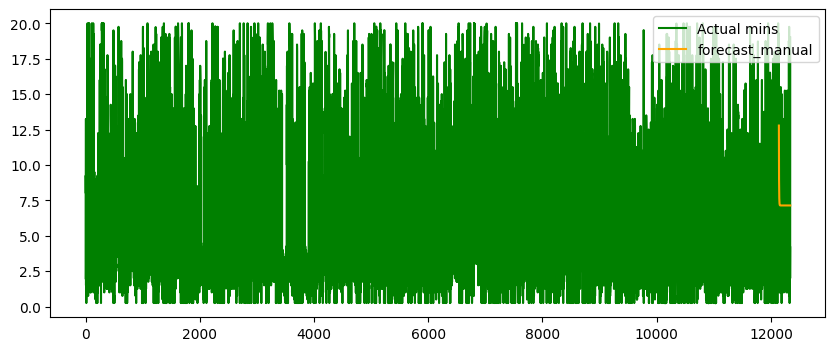

In [243]:
forecast_test = model_fit.forecast(len(df_test["mins"]))

df["forecast_manual"] = [None] * len(df_train["mins"]) + list(forecast_test)

plt.plot(df["mins"], color="green", label="Actual mins")
plt.plot(df["forecast_manual"], color="orange", label="forecast_manual")
plt.legend()

auto arima


In [244]:
import pmdarima as pm

auto_arima = pm.auto_arima(df_train["mins"], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [245]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                12140
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -35704.441
Date:                Sat, 24 Feb 2024   AIC                          71416.882
Time:                        20:19:08   BIC                          71446.499
Sample:                             0   HQIC                         71426.812
                              - 12140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4931      0.009    166.896      0.000       1.476       1.511
ar.L2         -0.4932      0.009    -54.997      0.000      -0.511      -0.476
ma.L1         -0.9875      0.002   -623.919      0.000      -0.991      -0.984
sigma2        20.9880      0.315     66.539      0.000      20.370      21.606
===================================================================================
Ljung-Box (L1) (Q):                   5.53   Jarque-Bera (JB):               373.71
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.32
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

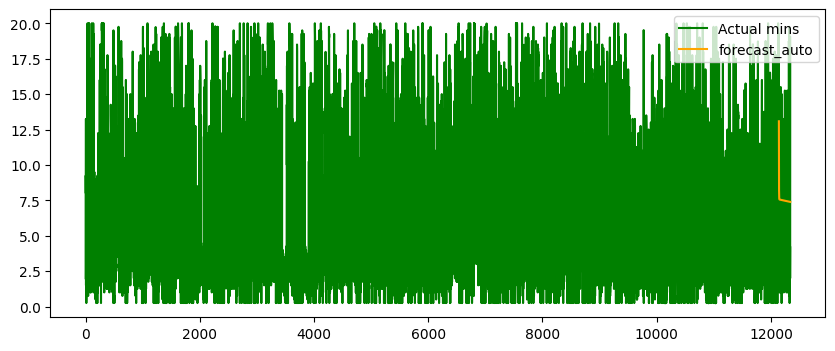

In [246]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df["forecast_auto"] = [None] * len(df_train) + list(forecast_test_auto)

plt.plot(df["mins"], color="green", label="Actual mins")
plt.plot(df["forecast_auto"], color="orange", label="forecast_auto")
plt.legend()

In [247]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
)

mae = mean_absolute_error(df_test["mins"], forecast_test)
mape = mean_absolute_percentage_error(df_test["mins"], forecast_test)
rmse = np.sqrt(mean_squared_error(df_test["mins"], forecast_test))

print(f"mae - manual: {mae}")
print(f"mape - manual: {mape}")
print(f"rmse - manual: {rmse}")

mae - manual: 4.388094836489132
mape - manual: 1.6195365949631795
rmse - manual: 5.043940042736595


In [248]:
mae = mean_absolute_error(df_test["mins"], forecast_test_auto)
mape = mean_absolute_percentage_error(df_test["mins"], forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test["mins"], forecast_test_auto))

print(f"mae - auto: {mae}")
print(f"mape - auto: {mape}")
print(f"rmse - auto: {rmse}")

mae - auto: 4.450891634892907
mape - auto: 1.6933865672427515
rmse - auto: 5.0703286233620855


## SARIMA


In [249]:
sarima = pm.auto_arima(
    df["mins"], start_p=1, start_q=1, test="adf", m=5, seasonal=True, trace=True
)

sarima

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[5] intercept   : AIC=72546.376, Time=13.13 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=76455.352, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=72588.911, Time=3.19 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=73492.453, Time=2.36 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=89029.724, Time=0.08 sec
 ARIMA(1,0,1)(0,0,1)[5] intercept   : AIC=72551.148, Time=3.36 sec
 ARIMA(1,0,1)(1,0,0)[5] intercept   : AIC=72551.034, Time=4.22 sec
 ARIMA(1,0,1)(2,0,1)[5] intercept   : AIC=72553.659, Time=9.21 sec
 ARIMA(1,0,1)(1,0,2)[5] intercept   : AIC=72547.865, Time=17.68 sec
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=72558.894, Time=1.58 sec
 ARIMA(1,0,1)(0,0,2)[5] intercept   : AIC=72552.804, Time=5.98 sec
 ARIMA(1,0,1)(2,0,0)[5] intercept   : AIC=72552.640, Time=6.92 sec
 ARIMA(1,0,1)(2,0,2)[5] intercept   : AIC=72545.318, Time=20.55 sec
 ARIMA(0,0,1)(2,0,2)[5] intercept   : AIC=inf, Time=17.41 sec
 ARIMA(1,0,0)(2,0,2)[

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True)

ARIMA(2,0,1)(0,0,0)[5] intercept

In [250]:
best_pdq = (2, 0, 1)
best_PDQS = (0, 0, 0, 5)
model = SARIMAX(
    df_train["mins"],
    order=best_pdq,
    seasonal_order=best_PDQS,
    enforce_stationarity=False,
    enforce_invertibility=False,
)
model = model.fit()

ARIMA predict


C:\Users\66898\AppData\Local\Temp\ipykernel_30636\3264013889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["predict"][0] = df_train["mins"][0]


20.99320961901002

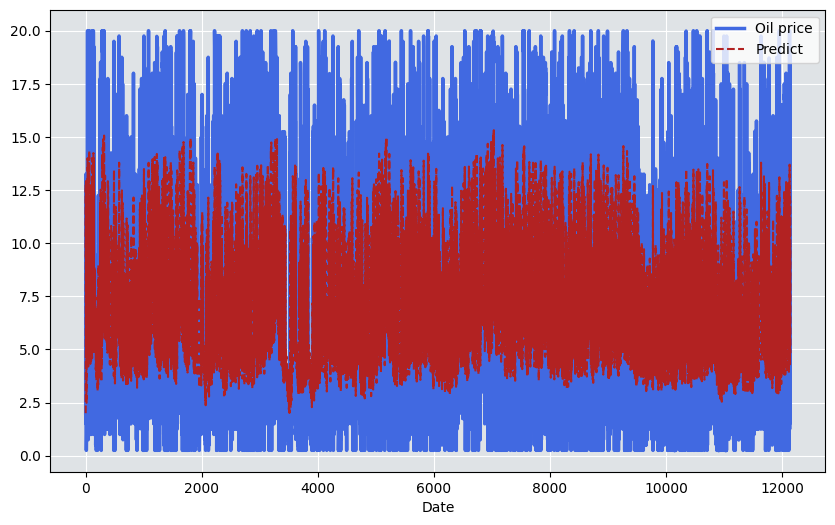

In [251]:
pred = model.predict()
df_train["predict"] = pred
# Fix missing first prediction date due to first different
df_train["predict"][0] = df_train["mins"][0]

df_train
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor("#dfe3e6")
plt.grid(color="w")
plt.plot(df_train["mins"], c="royalblue", linewidth=2.5, label="Oil price")
plt.plot(df_train["predict"], c="firebrick", linestyle="--", label="Predict")
plt.xlabel("Date")
plt.legend()

mean_squared_error(df_train["mins"], df_train["predict"])

SARIMA predict


C:\Users\66898\AppData\Local\Temp\ipykernel_30636\835648949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predict'][0] = df_train['mins'][0]


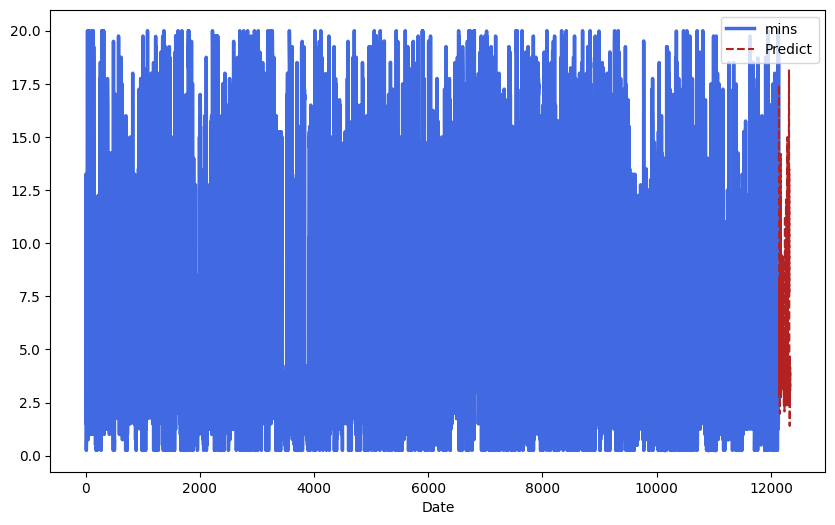

In [252]:
pred = results.get_prediction(
    start=len(df_train), end=len(df_train) + len(df_test) - 1)

pred_values = pred.predicted_mean


# Create a new column in the DataFrame for the predicted values

df_pred['predict'] = [None] * len(df_train) + pred_values.tolist()

# Fix missing first prediction date due to first different

df_pred['predict'][0] = df_train['mins'][0]


plt.figure(figsize=(10, 6))


plt.grid(color='w')

plt.plot(df_train['mins'], c='royalblue', linewidth=2.5, label='mins')

plt.plot(df_pred['predict'], c='firebrick', linestyle='--', label='Predict')

plt.xlabel('Date')

plt.legend()


# mean_squared_error(df_test['mins'], df_pred['predict'])

## Fill data with predict


372 สาย _ 7 วัน _ 24 ชั่วโมง


In [232]:
custom_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

list = []
for _, row in relationship_route.iterrows():
    route = row["route_id"]
    direction = row["direction"]
    seq = row["seq"]
    sid1 = row["sid1"]
    sid2 = row["sid2"]

    for day in custom_order:
        for i in range(0, 24):
            new_row_data = {
                "route_id": str(route),
                "direction": direction,
                "sid1": sid1,
                "sid2": sid2,
                "seq": seq,
                "hrs": i,
                "day_of_week": day,
            }
            list.append(new_row_data)

missing_df = pd.DataFrame(list)

In [233]:
duplicated_df = pd.concat([missing_df, df_routes_data], ignore_index=True)
duplicated_df

,route_id,direction,sid1,sid2,seq,hrs,day_of_week,mins
0,1-1,go,4769,3905,0,0,Monday,NaN
1,1-1,go,4769,3905,0,1,Monday,NaN
2,1-1,go,4769,3905,0,2,Monday,NaN
3,1-1,go,4769,3905,0,3,Monday,NaN
4,1-1,go,4769,3905,0,4,Monday,NaN
...,...,...,...,...,...,...,...,...
1875824,4-14,go,4686,4716,0,14,Monday,10.750000
1875825,1-38,go,3240,5325,4,6,Monday,1.500000
1875826,4-48,back,3695,2276,6,20,Monday,30.500000
1875827,4-62,go,4156,4157,26,14,Monday,7.983333


In [234]:
"Fill Nan"
df = duplicated_df[(duplicated_df["sid1"] == 4202) &
                   (duplicated_df["sid2"] == 4212)]
df.sort_values(by=["day_of_week", "hrs"], inplace=True)
print(df.isnull().sum())

Q3, Q1 = np.percentile(df["mins"], [25, 75])

IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)


# df = df.interpolate(method = 'cubic', limit_direction = 'forward', axis = 0)
# df['mins'] = df['mins'].interpolate(method='linear')


# print(df.isnull().sum())
# df
lower_bound

route_id         0
direction        0
sid1             0
sid2             0
seq              0
hrs              0
day_of_week      0
mins           336
dtype: int64


C:\Users\66898\AppData\Local\Temp\ipykernel_8608\3522719293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["day_of_week", "hrs"], inplace=True)


nan